In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as mcm
from epiweeks import Week
from matplotlib.ticker import PercentFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import baltic as bt
from datetime import datetime, timedelta
from matplotlib.patches import Circle
from matplotlib.lines import Line2D
import numpy as np
import seaborn as sns
from utils import timeseries_formatting

prop = mpl.font_manager.FontProperties('Roboto')
mpl.rcParams['font.sans-serif'] = prop.get_name()
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.size']=16

COLOR = '#343434'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

location_map = {
    "San Diego" : "#118ab2",
    "Baja California" : "#3A5A40",
    "Los Angeles" : "#ffd166",
    "United States" : "#ef476f",
    "Mexico" : "#073b4c",
    "Rest of World" : "#9e2a2b",
    "Random" : "#d9dbf1"
}

# Load input
Load results from PersistenceSummarizer. Records the percent of lineages in *eval_state* from *eval_time* to *anc_time* that arose from *anc_state*. This provides a clear indication of the relative contribution of introduced lineages vs. local transmission on the local epidemic.

In [3]:
ps = pd.read_csv( "../data/2021-08-30_fixed_eponential_discrete.Location.history.monthly.summary.csv", parse_dates=["eval_time", "anc_time"] )
ps = ps.loc[ps["eval_state"]=="Baja California"]
ps.head()

,eval_time,anc_time,anc_state,eval_state,proportion,hpdl,hpdu
12,2021-07-01,2021-06-01,Rest of World,Baja California,0.000000,0.0,0.0
13,2021-07-01,2021-06-01,United States,Baja California,0.092965,0.0,0.5
14,2021-07-01,2021-06-01,Baja California,Baja California,0.402978,0.0,1.0
15,2021-07-01,2021-06-01,San Diego,Baja California,0.398403,0.0,1.0
16,2021-07-01,2021-06-01,Mexico,Baja California,0.097346,0.0,1.0


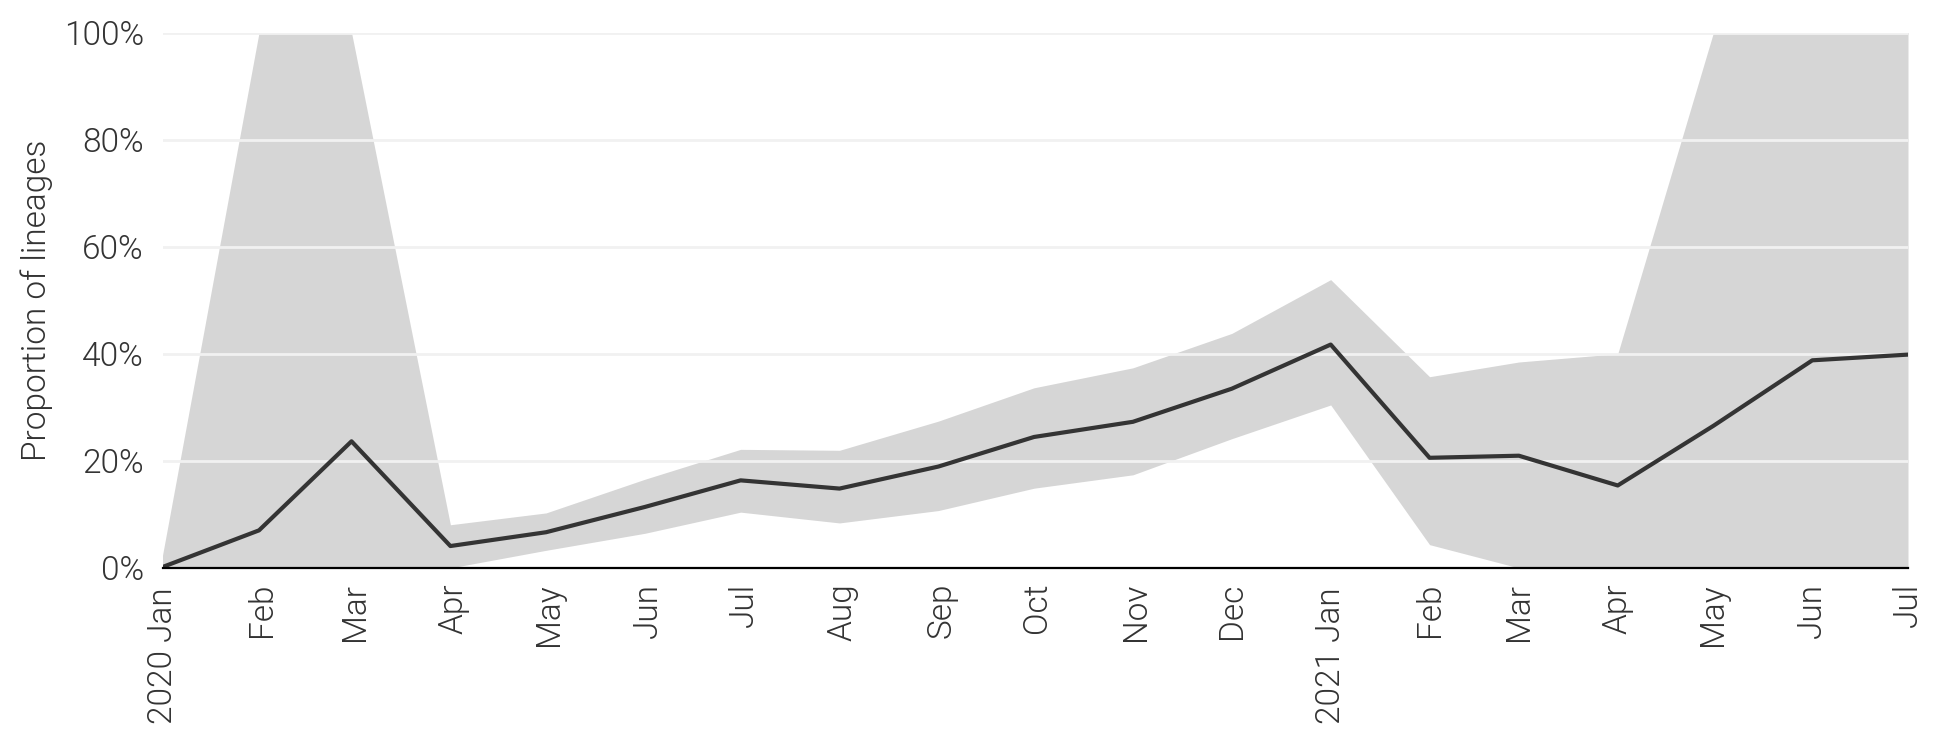

In [4]:
def plot_persistence_single( axis, df, location ):
    plot_df = df.loc[df["anc_state"]==location]
    axis.plot( "eval_time", "proportion", data=plot_df, color=COLOR )
    axis.fill_between( "eval_time", "hpdl", "hpdu", data=plot_df, color=COLOR, alpha=0.2, linewidth=0 )
    axis.yaxis.set_major_formatter( PercentFormatter( 1, 0 ) )
    timeseries_formatting( axis, ylabel="Proportion of lineages", ylims=[0,1], xlims=[pd.to_datetime("2020-01-01"), pd.to_datetime("2021-07-01")] )

fig, ax = plt.subplots( dpi=200, figsize=(10,4) )
plot_persistence_single( ax, ps, "San Diego" )
plt.tight_layout()
plt.show()

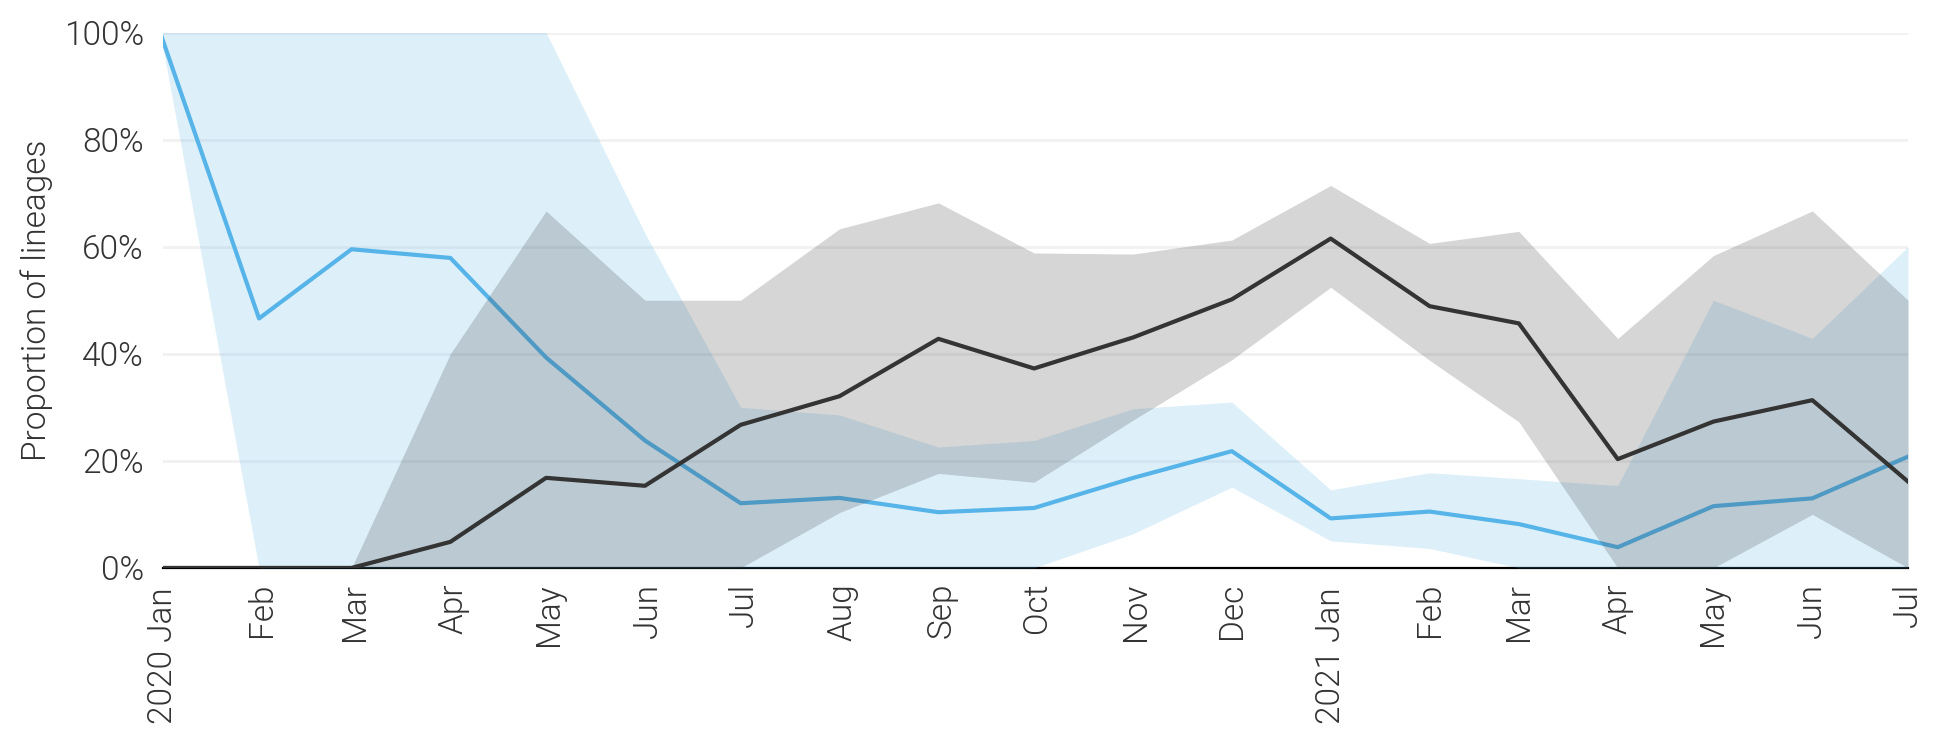

In [17]:
fig, ax = plt.subplots( dpi=200, figsize=(10,4) )
plot_df = ps.loc[ps["anc_state"]=="Baja California"]
ax.plot( "eval_time", "proportion", data=plot_df, color="#56B4E9", zorder=9 )
ax.fill_between( "eval_time", "hpdl", "hpdu", data=plot_df, color="#56B4E9", alpha=0.2, linewidth=0, zorder=8 )

plot_df = ps.loc[ps["anc_state"]=="San Diego"]
ax.plot( "eval_time", "proportion", data=plot_df, color=COLOR, zorder=11 )
ax.fill_between( "eval_time", "hpdl", "hpdu", data=plot_df, color=COLOR, alpha=0.2, linewidth=0, zorder=10 )

ax.yaxis.set_major_formatter( PercentFormatter( 1, 0 ) )
timeseries_formatting(
    ax,
    spines=["bottom"],
    ylabel="Proportion of lineages",
    ylims=[0,1],
    xlims=[pd.to_datetime("2020-01-01"), pd.to_datetime("2021-07-01")] )

plt.tight_layout()
plt.savefig("../figures/persistence_SD_BC.pdf")
plt.show()

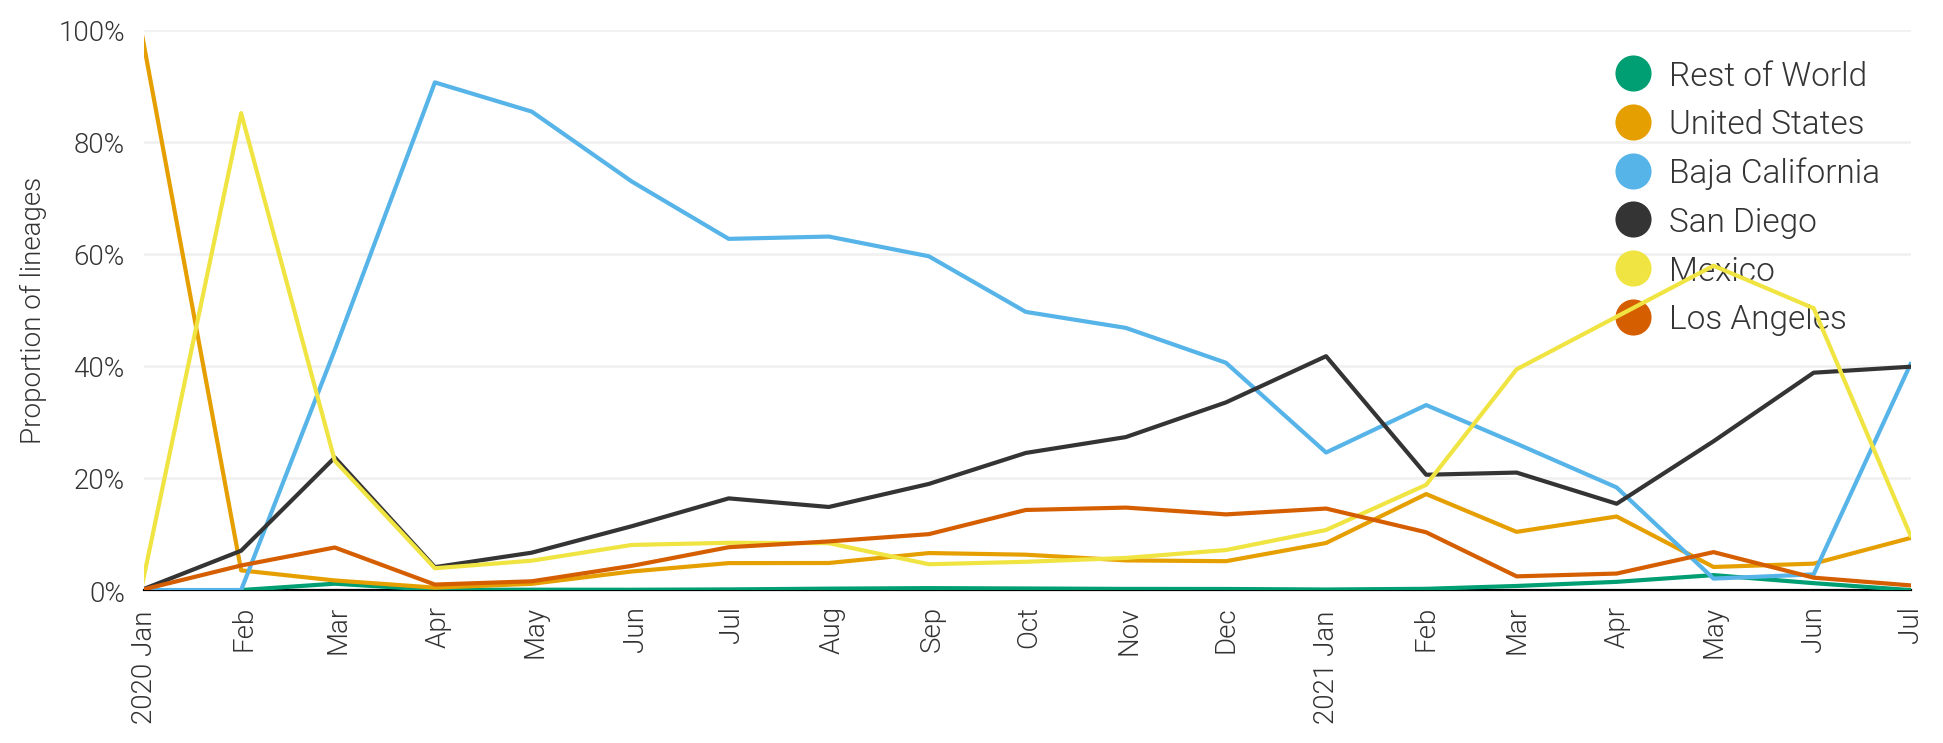

In [6]:
ps["anc_state"].unique()

color_dict = [
     ["Rest of World","#009E73"],
     ["United States","#E69F00"],
     ["Baja California","#56B4E9"],
     ["San Diego",COLOR],
     ["Mexico","#F0E442"],
     ["Los Angeles","#D55E00"]
]

leg = []
fig, ax = plt.subplots( dpi=200, figsize=(10,4) )
for loc, col in color_dict:
    plot_df = ps.loc[ps["anc_state"]==loc]
    ax.plot( "eval_time", "proportion", data=plot_df, color=col, zorder=9 )
    leg.append( Line2D([0], [0], linestyle='none', marker='o', color=col, label=loc, markersize=12 ) )

ax.yaxis.set_major_formatter( PercentFormatter( 1, 0 ) )
timeseries_formatting(
    ax,
    spines=["bottom"],
    ylabel="Proportion of lineages",
    ylims=[0,1],
    xlims=[pd.to_datetime("2020-01-01"), pd.to_datetime("2021-07-01")],
    ysize=10,
    xsize=10
)
ax.legend( handletextpad=0.1, handles=leg, frameon=False, fontsize=12 )

plt.tight_layout()
plt.savefig( "../figures/persistence_BC_all.pdf" )
plt.show()